In [36]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="white")

ROGI_KEY = "rogi"
CSV_DIR = Path("./results/raw")
               
def condense(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby(["dataset_and_task", "featurizer", "n_valid"])\
        .agg({ROGI_KEY: ['mean', 'std']})\
        .reset_index()

In [45]:
# df_desc = pd.read_csv("./results/raw/desc.csv")
# df_vae = pd.read_csv("./results/raw/VAE.csv")

dfs = list(map(pd.read_csv, CSV_DIR.iterdir()))
df = pd.concat(
    [condense(df) for df in dfs], ignore_index=True
).set_index(['dataset_and_task', 'featurizer'])
df

n_valid      rogi     
                                                mean  std
dataset_and_task        featurizer                       
AMLODIPINE_MPO          gin          10000  0.355084  0.0
ARIPIPRAZOLE_SIMILARITY gin          10000  0.203405  0.0
CACO2_WANG              gin            910  0.268373  0.0
CELECOXIB_REDISCOVERY   gin          10000  0.217121  0.0
CLEARANCE_HEPATOCYTE_AZ gin           1213  0.537881  0.0
...                                    ...       ...  ...
SCAFFOLD HOP            chemberta    10000  0.258352  0.0
SOLUBILITY_AQSOLDB      chemberta     9982  0.249852  0.0
VALSARTAN_SMARTS        chemberta    10000  0.018165  0.0
VDSS_LOMBARDO           chemberta     1130  0.050939  0.0
ZALEPLON_MPO            chemberta    10000  0.359780  0.0

[104 rows x 3 columns]

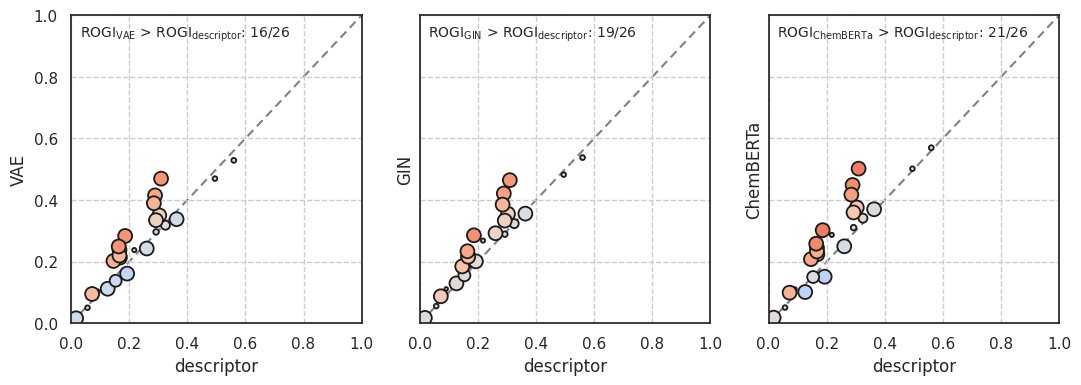

In [129]:
def parity_plot(ax: plt.Axes, df: pd.DataFrame, x_key: str, y_key: str):
    BUFFER = 0.03

    x = df.xs(x_key.lower(), level=1)[ROGI_KEY]['mean'].values
    y = df.xs(y_key.lower(), level=1)[ROGI_KEY]['mean'].values
    s = (df.groupby('dataset_and_task')["n_valid"].mean().values) / 1e2
    z = (y - x) / x

    data = ax.scatter(x, y, s, z, vmin=-1, vmax=1, cmap="coolwarm", edgecolors='k', lw=1.3)

    x_par = np.tile(np.linspace(0, 1, 15), (2, 1))
    ax.plot(*x_par, '--', c='grey', dashes=(4, 2.5), zorder=-1)

    rogi_string = lambda s : rf"$\mathrm{{ROGI}}_{{\mathrm{{{s}}}}}$"
    s = f"{rogi_string(y_key)} > {rogi_string(x_key)}: {(z > 0).sum()}/{len(z)}"
    ax.text(
        0 + BUFFER, 1 - BUFFER, s, fontsize=10,
        transform=ax.transAxes, ha="left", va="top"
    )
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(axis="both", ls="--")

    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)

fig, axs = plt.subplots(1, 3, figsize=(4.25 * 3, 4), sharex=True, sharey=True)

X_KEY = "descriptor"
for ax, y_key in zip(axs, ["VAE", "GIN", "ChemBERTa"]):
    parity_plot(ax, df, X_KEY, y_key)

In [89]:
fig.savefig("./results/figures/bert-vae-gin.pdf", bbox_inches="tight")

In [95]:
N = (df.groupby('dataset_and_task')["n_valid"].mean().values)
N

array([10000., 10000.,   910., 10000.,  1213.,  1102., 10000.,   667.,
       10000., 10000., 10000.,   642.,  7385.,  4200., 10000., 10000.,
       10000., 10000.,  1614., 10000., 10000., 10000.,  9982., 10000.,
        1130., 10000.])

In [130]:
np.log(N)

array([9.21034037, 9.21034037, 6.8134446 , 9.21034037, 7.10085191,
       7.00488199, 9.21034037, 6.50279005, 9.21034037, 9.21034037,
       9.21034037, 6.4645883 , 8.90720619, 8.3428398 , 9.21034037,
       9.21034037, 9.21034037, 9.21034037, 7.38647085, 9.21034037,
       9.21034037, 9.21034037, 9.20853875, 9.21034037, 7.02997291,
       9.21034037])

In [131]:
np.log10(N)

array([4.        , 4.        , 2.95904139, 4.        , 3.0838608 ,
       3.04218159, 4.        , 2.82412583, 4.        , 4.        ,
       4.        , 2.80753503, 3.8683505 , 3.62324929, 4.        ,
       4.        , 4.        , 4.        , 3.20790353, 4.        ,
       4.        , 4.        , 3.99921757, 4.        , 3.05307844,
       4.        ])